In [78]:
#Importing Packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Reading the data

df=pd.read_csv("philosophy_data.csv")

display(df)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
...,...,...,...,...,...,...,...,...,...,...,...
360803,"Women, Race, And Class",Davis,feminism,But the socialization of housework including m...,But the socialization of housework including m...,1981,1981,142,but the socialization of housework including m...,"['but', 'the', 'socialization', 'of', 'housewo...",but the socialization of housework include me...
360804,"Women, Race, And Class",Davis,feminism,The only significant steps toward endingdomest...,The only significant steps toward endingdomest...,1981,1981,117,the only significant steps toward endingdomest...,"['the', 'only', 'significant', 'steps', 'towar...",the only significant step toward endingdomest...
360805,"Women, Race, And Class",Davis,feminism,"Working women, therefore, have a special and v...","Working women, therefore, have a special and v...",1981,1981,90,"working women, therefore, have a special and v...","['working', 'women', 'therefore', 'have', 'spe...","working woman , therefore , have a special an..."
360806,"Women, Race, And Class",Davis,feminism,"Moreover, under capitalism, campaigns for jobs...","Moreover, under capitalism, campaigns for jobs...",1981,1981,199,"moreover, under capitalism, campaigns for jobs...","['moreover', 'under', 'capitalism', 'campaigns...","moreover , under capitalism , campaign for jo..."


In [2]:
t=df.groupby("title")
t.describe()

original_publication_date  \
                                                                       count   
title                                                                          
A General Theory Of Employment, Interest, And M...                    3411.0   
A Treatise Concerning The Principles Of Human K...                    1040.0   
A Treatise Of Human Nature                                            7047.0   
Anti-Oedipus                                                          6679.0   
Aristotle - Complete Works                                           48779.0   
Being And Time                                                        8505.0   
Beyond Good And Evil                                                  1906.0   
Capital                                                              12996.0   
Critique Of Judgement                                                 4204.0   
Critique Of Practical Reason                                          2452.0   
Critique Of Pure Reason                                               7472.0   
Dialogues Concerning Natural Religion                                 1265.0   
Difference And Repetition                                             5861.0   
Discourse On Method                                                    340.0   
Ecce Homo                                                             1504.0   
Elements Of The Philosophy Of Right                                   4923.0   
Enchiridion                                                            323.0   
Essay Concerning Human Understanding                                  7742.0   
Essential Works Of Lenin                                              4469.0   
Ethics                                                                3304.0   
History Of Madness                                                    8033.0   
Lewis - Papers                                                       13120.0   
Meditations                                                           2212.0   
Meditations On First Philosophy                                        792.0   
Naming And Necessity                                                  2681.0   
Off The Beaten Track                                                  6734.0   
On Certainty                                                          1984.0   
On The Improvement Of Understanding                                    489.0   
On The Principles Of Political Economy And Taxa...                    3090.0   
Philosophical Investigations                                          5838.0   
Philosophical Studies                                                 3668.0   
Philosophical Troubles                                                9798.0   
Plato - Complete Works                                               38366.0   
Quintessence                                                          7373.0   
Science Of Logic                                                     10678.0   
Second Treatise On Government                                         1143.0   
The Analysis Of Mind                                                  3513.0   
The Antichrist                                                        1170.0   
The Birth Of The Clinic                                               2518.0   
The Communist Manifesto                                                493.0   
The Crisis Of The European Sciences And Phenome...                    4832.0   
The Idea Of Phenomenology                                              910.0   
The Logic Of Scientific Discovery                                     4678.0   
The Order Of Things                                                   4689.0   
The Phenomenology Of Perception                                       7592.0   
The Phenomenology Of Spirit                                           7099.0   
The Problems Of Philosophy                                            1560.0   
The Search After Truth                             

In [3]:
a=df.groupby("author")
a.describe()

original_publication_date                                  \
                                    count         mean        std     min   
author                                                                      
Aristotle                         48779.0  -320.000000   0.000000  -320.0   
Beauvoir                          13017.0  1949.000000   0.000000  1949.0   
Berkeley                           2734.0  1711.858815   1.456718  1710.0   
Davis                              3059.0  1981.000000   0.000000  1981.0   
Deleuze                           12540.0  1970.130463   1.995820  1968.0   
Derrida                            5999.0  1967.000000   0.000000  1967.0   
Descartes                          1132.0  1639.798587   1.834457  1637.0   
Epictetus                           323.0   125.000000   0.000000   125.0   
Fichte                             5308.0  1798.000000   0.000000  1798.0   
Foucault                          15240.0  1962.868832   2.204679  1961.0   
Hegel                             22700.0  1814.523304   5.205012  1807.0   
Heidegger                         15239.0  1937.163528  11.422452  1927.0   
Hume                               8312.0  1745.087584  14.369048  1739.0   
Husserl                            5742.0  1931.404040  10.591483  1907.0   
Kant                              14128.0  1784.892978   4.177676  1781.0   
Keynes                             3411.0  1936.000000   0.000000  1936.0   
Kripke                            12479.0  1974.355477   1.232185  1972.0   
Leibniz                            5027.0  1710.000000   0.000000  1710.0   
Lenin                              4469.0  1862.000000   0.000000  1862.0   
Lewis                             13120.0  1985.000000   0.000000  1985.0   
Locke                              8885.0  1689.000000   0.000000  1689.0   
Malebranche                       12997.0  1674.000000   0.000000  1674.0   
Marcus Aurelius                    2212.0   170.000000   0.000000   170.0   
Marx                              13489.0  1881.720810   6.567993  1848.0   
Merleau-Ponty                      7592.0  1945.000000   0.000000  1945.0   
Moore                              3668.0  1910.000000   0.000000  1910.0   
Nietzsche                         13548.0  1887.281960   0.695604  1886.0   
Plato                             38366.0  -350.000000   0.000000  -350.0   
Popper                             4678.0  1959.000000   0.000000  1959.0   
Quine                              7373.0  1950.000000   0.000000  1950.0   
Ricardo                            3090.0  1817.000000   0.000000  1817.0   
Russell                            5073.0  1918.232407   4.153573  1912.0   
Smith                             11693.0  1776.000000   0.000000  1776.0   
Spinoza                            3793.0  1677.000000   0.000000  1677.0   
Wittgenstein                       9034.0  1948.048041  10.716670  1921.0   
Wollstonecraft                     2559.0  1792.000000   0.000000  1792.0   

                                                corpus_edition_date  \
                    25%     50%     75%     max               count   
author                                                                
Aristotle        -320.0  -320.0  -320.0  -320.0             48779.0   
Beauvoir         1949.0  1949.0  1949.0  1949.0             13017.0   
Berkeley         1710.0  1713.0  1713.0  1713.0              2734.0   
Davis            1981.0  1981.0  1981.0  1981.0              3059.0   
Deleuze          1968.0  1972.0  1972.0  1972.0             12540.0   
Derrida          1967.0  1967.0  1967.0  1967.0              5999.0   
Descartes        1637.0  1641.0  1641.0  1641.0              1132.0   
Epictetus         125.0   125.0   125.0   125.0               323.0   
Fichte           1798.0  1798.0  1798.0  1798.0              5308.0   
Foucault         1961.0  1961.0  1966.0  1966.0             15240.0   
Hegel            1807.0  1817.0  1817.0  1820.0             22700.0   
Heidegger        1

In [4]:
s=df.groupby("school")
s.describe()

original_publication_date                                  \
                                    count         mean        std     min   
school                                                                      
analytic                          55425.0  1958.655354  23.978784  1910.0   
aristotle                         48779.0  -320.000000   0.000000  -320.0   
capitalism                        18194.0  1812.959987  60.984677  1776.0   
communism                         17958.0  1876.813120  10.252063  1848.0   
continental                       33779.0  1966.298292   3.810169  1961.0   
empiricism                        19931.0  1715.526316  27.683636  1689.0   
feminism                          18635.0  1932.693319  57.334263  1792.0   
german_idealism                   42136.0  1802.506906  14.311706  1781.0   
nietzsche                         13548.0  1887.281960   0.695604  1886.0   
phenomenology                     28573.0  1938.088300  10.688899  1907.0   
plato                             38366.0  -350.000000   0.000000  -350.0   
rationalism                       22949.0  1680.694627  17.275349  1637.0   
stoicism                           2535.0   164.266272  15.007697   125.0   

                                                corpus_edition_date  \
                    25%     50%     75%     max               count   
school                                                                
analytic         1950.0  1959.0  1975.0  1985.0             55425.0   
aristotle        -320.0  -320.0  -320.0  -320.0             48779.0   
capitalism       1776.0  1776.0  1817.0  1936.0             18194.0   
communism        1862.0  1883.0  1883.0  1883.0             17958.0   
continental      1963.0  1967.0  1968.0  1972.0             33779.0   
empiricism       1689.0  1713.0  1739.0  1779.0             19931.0   
feminism         1949.0  1949.0  1949.0  1981.0             18635.0   
german_idealism  1790.0  1807.0  1817.0  1820.0             42136.0   
nietzsche        1887.0  1887.0  1888.0  1888.0             13548.0   
phenomenology    1927.0  1945.0  1945.0  1950.0             28573.0   
plato            -350.0  -350.0  -350.0  -350.0             38366.0   
rationalism      1674.0  1674.0  1677.0  1710.0             22949.0   
stoicism          170.0   170.0   170.0   170.0              2535.0   

                              ...                 sentence_length              \
                        mean  ...     75%     max           count        mean   
school                        ...                                               
analytic         2003.105386  ...  2008.0  2015.0         55425.0  119.025205   
aristotle        1991.000000  ...  1991.0  1991.0         48779.0  153.224953   
capitalism       2008.044960  ...  2009.0  2010.0         18194.0  187.576289   
communism        1908.938412  ...  1966.0  1970.0         17958.0  152.752311   
continental      2000.471476  ...  2003.0  2006.0         33779.0  171.792060   
empiricism       2004.993728  ...  2009.0  2010.0         19931.0  183.638051   
feminism         2003.305125  ...  2009.0  2009.0         18635.0  153.083928   
german_idealism  1998.697646  ...  2010.0  2010.0         42136.0  180.251329   
nietzsche        2009.814142  ...  2016.0  2016.0         13548.0  116.599867   
phenomenology    1994.471284  ...  2002.0  2002.0         28573.0  145.913345   
plato            1997.000000  ...  1997.0  1997.0         38366.0  114.938018   
rationalism      2000.158830  ...  2005.0  2008.0         22949.0  163.958996   
stoicism         2008.764497  ...  2008.0  2014.0          2535.0  137.056410   

                                                                
                        std   min    25%    50%    75%     max  
school                                                          
analytic          74.358290  20.0   63.0  104.0  157.0  1140.0  
aristotle         94.839156  20.0   85.0  133.0  199.0  1460.0  
capitalism       109.860

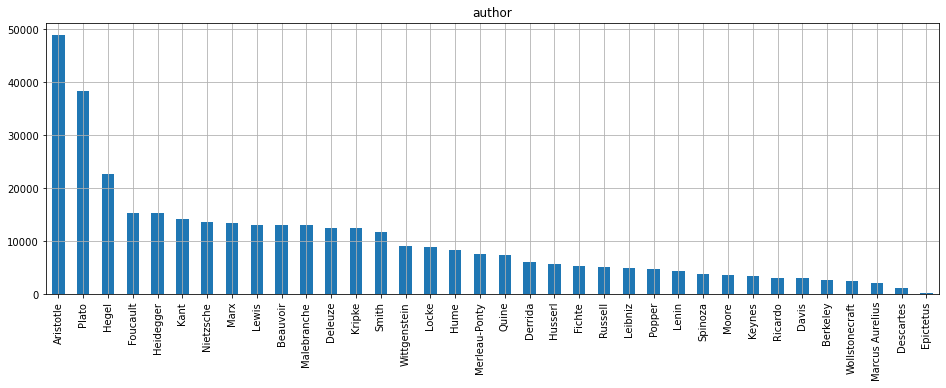

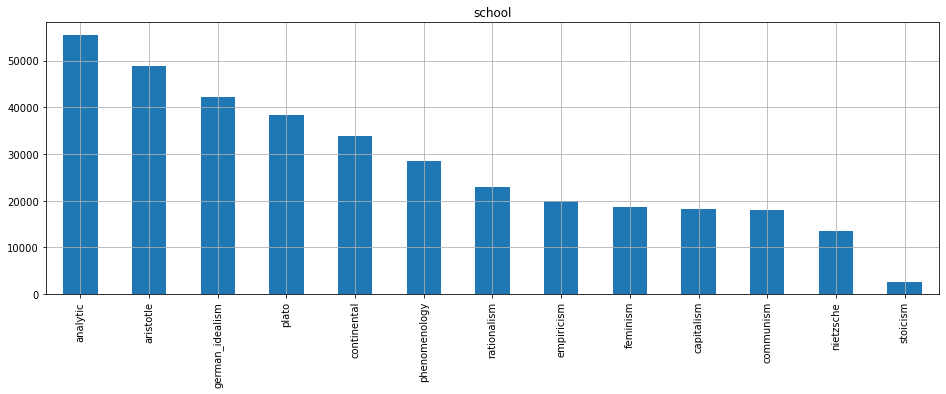

In [13]:
#analyzing the different parameters author and school

parameters = ["author", "school"]

for p in parameters:
    plt.figure(figsize=(16,5))
    df[p].value_counts().plot(kind='bar')
    plt.title(p)
    plt.grid()
    plt.show()

<AxesSubplot:>

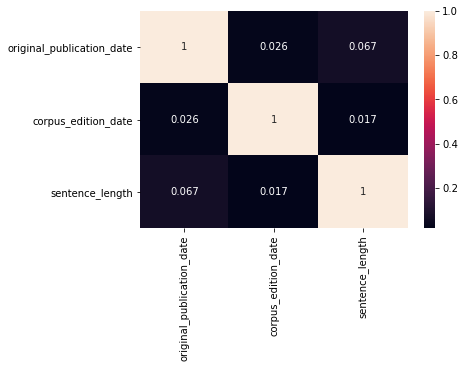

In [14]:
#creating heat map to see correlation between all the parameters

sns.heatmap(df.corr(), annot=True)


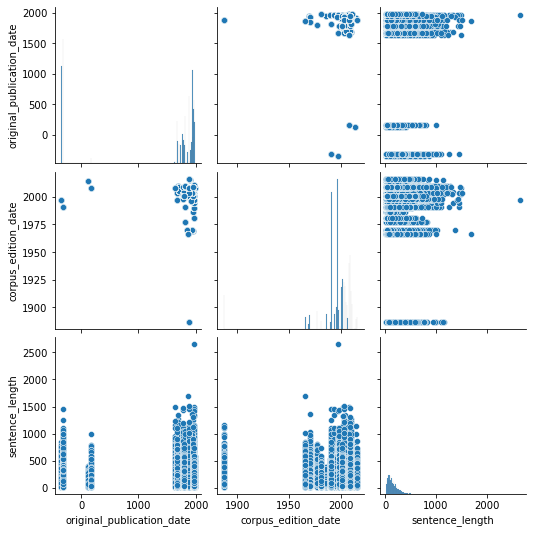

In [15]:
#making a pairplot to see which parameters have an effect on each other

sns.pairplot(df)


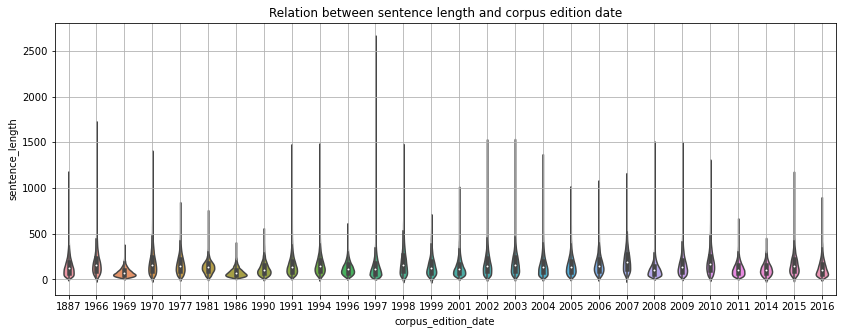

In [21]:
#Violin plots show how sentence length corresponds to which year a particular school was predominant in 

plt.figure(figsize=(14,5))
sns.violinplot(x="corpus_edition_date", y="sentence_length", data=df)
plt.title("Relation between sentence length and corpus edition date")
plt.grid()

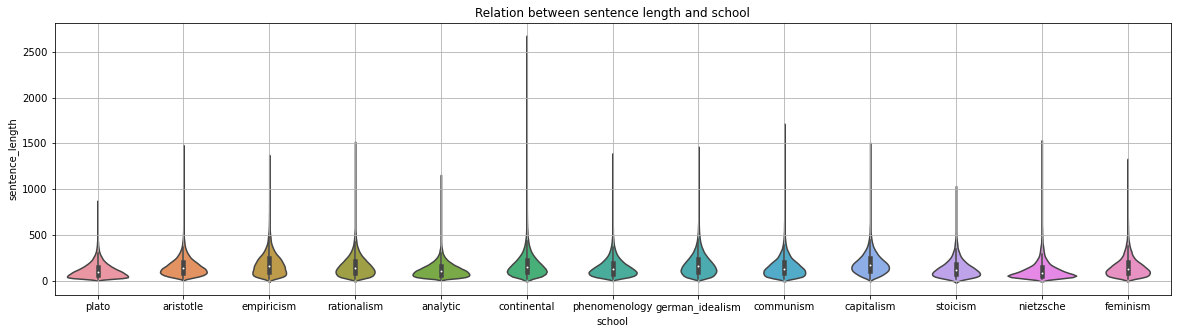

In [40]:
plt.figure(figsize=(20,5))
sns.violinplot(x="school", y="sentence_length", data=df)
plt.title("Relation between sentence length and school")
plt.grid()

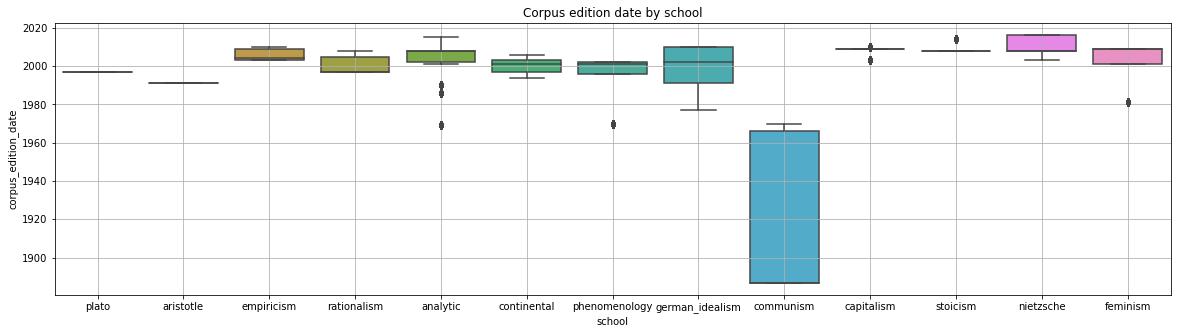

In [34]:
#Boxplot confirms findings from before

plt.figure(figsize=(20,5))
sns.boxplot(x="school", y="corpus_edition_date", data=df)
plt.title("Corpus edition date by school")
plt.grid()

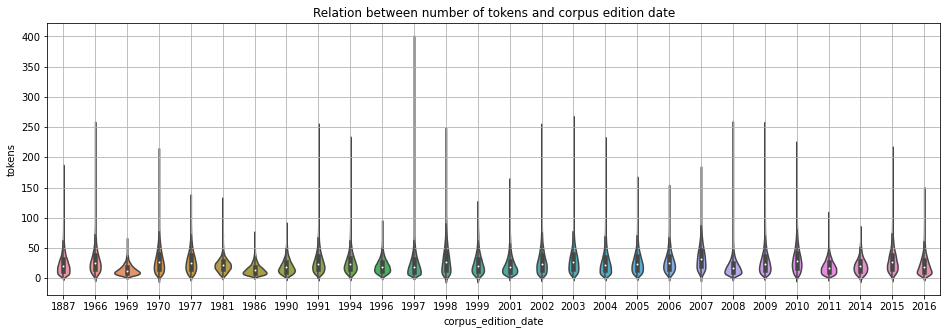

In [37]:
#Comparison between violin plots show relation between sentence length and number of tokens

df["tokens"] = list(map(len,map(eval,df.tokenized_txt)))
plt.figure(figsize=(16,5))
sns.violinplot(x="corpus_edition_date", y="tokens", data=df)
plt.title("Relation between number of tokens and corpus edition date")
plt.grid()

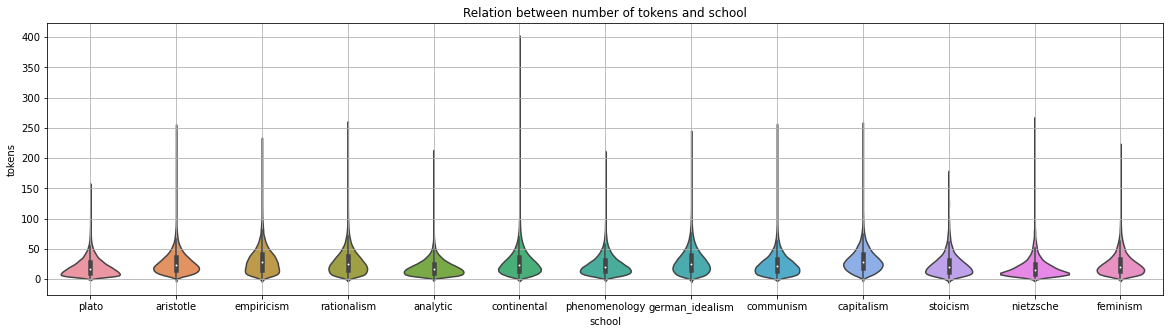

In [41]:
plt.figure(figsize=(20,5))
sns.violinplot(x="school", y="tokens", data=df)
plt.title("Relation between number of tokens and school")
plt.grid()

In [43]:
#finding mean values corresponding to title, author and school

df.groupby(by=["title","author","school"]).mean().round(2)


,,,original_publication_date,corpus_edition_date,sentence_length,n_tokens,tokens
title,author,school,,,,,
"A General Theory Of Employment, Interest, And Money",Keynes,capitalism,1936.0,2003.0,196.65,32.60,32.60
A Treatise Concerning The Principles Of Human Knowledge,Berkeley,empiricism,1710.0,2009.0,184.72,32.15,32.15
A Treatise Of Human Nature,Hume,empiricism,1739.0,2003.0,183.01,30.74,30.74
Anti-Oedipus,Deleuze,continental,1972.0,1997.0,165.51,26.64,26.64
Aristotle - Complete Works,Aristotle,aristotle,-320.0,1991.0,153.22,27.51,27.51
Being And Time,Heidegger,phenomenology,1927.0,1996.0,126.47,20.95,20.95
Beyond Good And Evil,Nietzsche,nietzsche,1886.0,2003.0,188.08,31.44,31.44
Capital,Marx,communism,1883.0,1887.0,142.97,23.89,23.89
Critique Of Judgement,Kant,german_idealism,1790.0,2007.0,211.98,35.34,35.34


Author =  Aristotle :


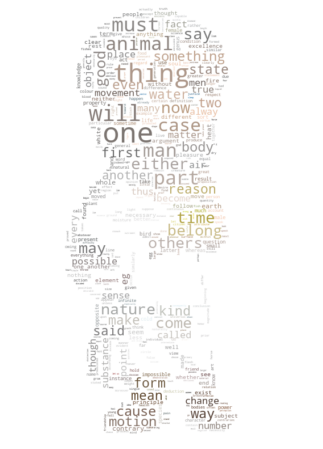

In [54]:
#Creating wordclouds of 5 authors by masking onto a picture of the philisopher

authors=["Aristotle"]
for sc in authors:
    df_temp = df[df.author==sc]
    
    print('Author = ', sc, ':')
    
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    custom_mask = np.array(Image.open("a2.png"))
    wordcloud = WordCloud(max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white", mask=custom_mask).generate(text)
    image_colors = ImageColorGenerator(custom_mask)     
    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Author =  Hume :


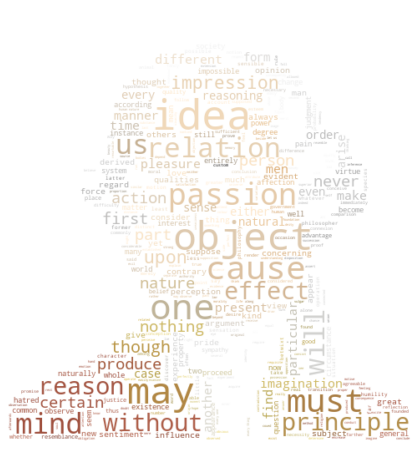

In [55]:
authors=["Hume"]
for sc in authors:
    df_temp = df[df.author==sc]
    
    print('Author = ', sc, ':')
    
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    custom_mask = np.array(Image.open("hume.png"))
    wordcloud = WordCloud(max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white", mask=custom_mask).generate(text)
    image_colors = ImageColorGenerator(custom_mask)     
    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Author =  Kant :


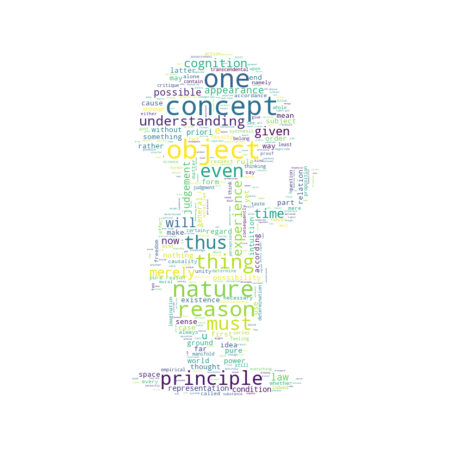

In [56]:
authors=["Kant"]
for sc in authors:
    df_temp = df[df.author==sc]
    
    print('Author = ', sc, ':')
    
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    custom_mask = np.array(Image.open("kant.png"))
    wordcloud = WordCloud(max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white", mask=custom_mask).generate(text)
#    image_colors = ImageColorGenerator(custom_mask)     
#    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Author =  Marx :


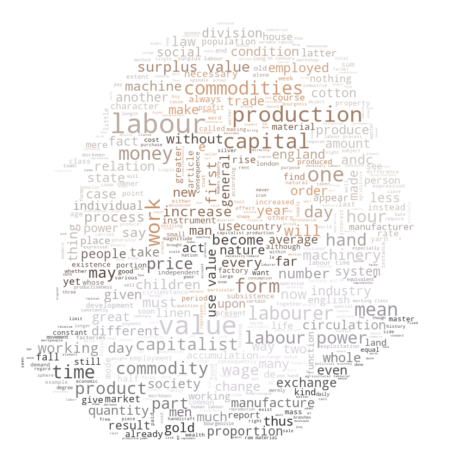

In [57]:
authors=["Marx"]
for sc in authors:
    df_temp = df[df.author==sc]
    
    print('Author = ', sc, ':')
    
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    custom_mask = np.array(Image.open("marx.png"))
    wordcloud = WordCloud(max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white", mask=custom_mask).generate(text)
    image_colors = ImageColorGenerator(custom_mask)     
    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Author =  Plato :


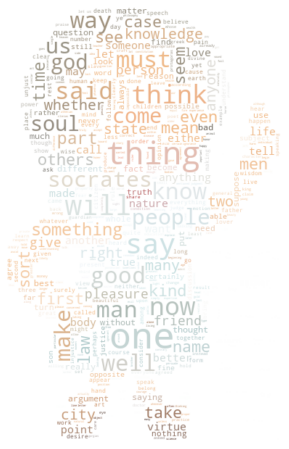

In [58]:
authors=["Plato"]
for sc in authors:
    df_temp = df[df.author==sc]
    
    print('Author = ', sc, ':')
    
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    custom_mask = np.array(Image.open("plato.png"))
    wordcloud = WordCloud(max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white", mask=custom_mask).generate(text)
    image_colors = ImageColorGenerator(custom_mask)     
    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()